In [2]:
##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


In [7]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/nyc.csv",encoding='latin1')
del df["Case"]
df.tail()

,Restaurant,Price,Food,Decor,Service,East
163,Baci,31,17,15,16,0
164,Puccini,26,20,16,17,0
165,Bella Luna,31,18,16,17,0
166,Métisse,38,22,17,21,0
167,Gennaro,34,24,10,16,0


In [35]:

model1 = sm.OLS.from_formula("Price ~ Food+Decor+Service+East",data = df)
result1= model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     68.76
Date:                Wed, 25 Oct 2017   Prob (F-statistic):           5.35e-34
Time:                        18:53:12   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1069.
Df Residuals:                     163   BIC:                             1084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.0238      4.708     -5.102      0.0

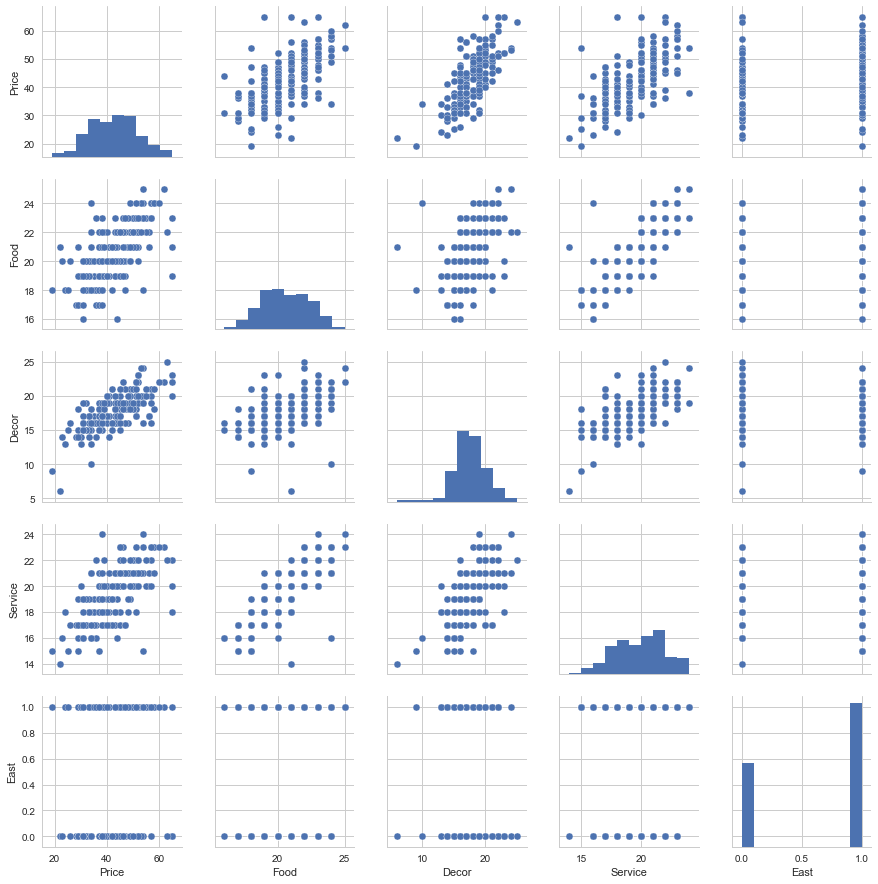

In [17]:
sns.pairplot(df)

In [36]:

model2 = sm.OLS.from_formula("Price ~ Food+Decor+East",data = df)
result2= model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     92.24
Date:                Wed, 25 Oct 2017   Prob (F-statistic):           5.10e-35
Time:                        18:53:26   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1067.
Df Residuals:                     164   BIC:                             1079.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.0269      4.673     -5.142      0.0

In [45]:
df
test1= pd.DataFrame({"Food":[20],"Decor":[20],"Service": [20],"East":[1]})
result1.predict(test1)

0    46.953842
dtype: float64

In [49]:
idx = result2.resid_pearson >2
df[idx]

,Restaurant,Price,Food,Decor,Service,East
29,Harry Cipriani,65,21,20,20,1
44,Bravo Gianni,56,22,17,21,1
47,Il Valletto Due Mila,56,21,17,20,1
55,Nello,54,18,16,15,1
102,Rao's,57,23,16,20,1
129,Rainbow Grill,65,19,23,18,0
131,San Domenico,65,23,22,22,0


In [66]:
predict = result2.predict(df)
predict[idx]

29     48.490851
44     44.299078
47     42.762732
55     36.244322
102    43.926051
129    49.079266
131    53.315276
dtype: float64

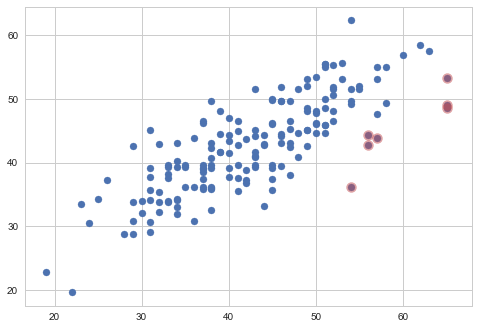

In [73]:

plt.scatter(df.Price,predict)
plt.scatter(df.Price[idx],predict[idx],s=100,c="r",alpha=0.5)

In [80]:
inf = result2.get_influence()
h = inf.hat_matrix_diag
idx = h >3 * h.mean()
plt.scatter(df.Price,predict)
plt.scatter(df.Price[idx],predict[idx],s=100,c="r",alpha=0.5)

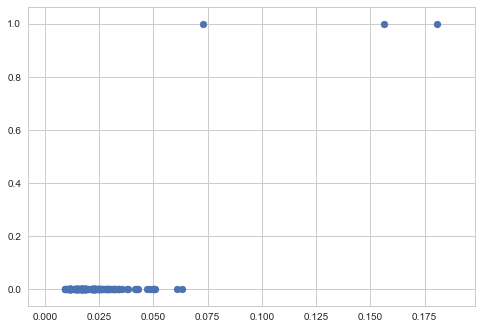

In [81]:
plt.scatter(h,idx)